In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d mkechinov/ecommerce-behavior-data-from-multi-category-store

100% 4.28G/4.29G [00:49<00:00, 98.6MB/s]
100% 4.29G/4.29G [00:49<00:00, 92.7MB/s]


In [3]:
#Unzipping the dataset file
import zipfile
zip_ref = zipfile.ZipFile('/content/ecommerce-behavior-data-from-multi-category-store.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

##Data Preparation and Cleaning

In [1]:
data= '/content/2019-Oct.csv'

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(data)

In [4]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

4

In [7]:
missing_percentages = df.isna().sum().sort_values(ascending=False)
missing_percentages

category_code    13515609
brand             6117080
user_session            2
event_time              0
event_type              0
product_id              0
category_id             0
price                   0
user_id                 0
dtype: int64

<Axes: >

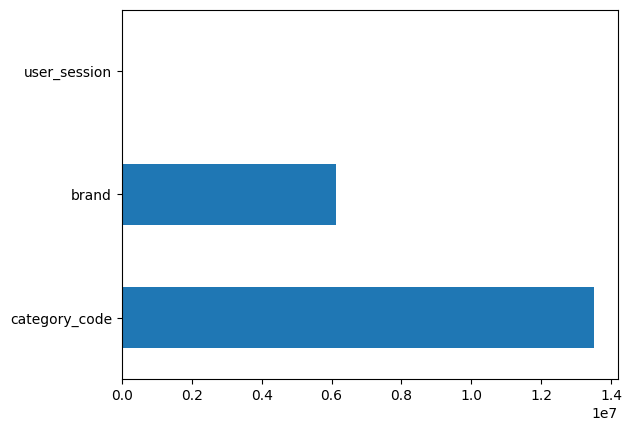

In [8]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

In [9]:
df = df.drop('category_code', axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_time    object 
 1   event_type    object 
 2   product_id    int64  
 3   category_id   int64  
 4   brand         object 
 5   price         float64
 6   user_id       int64  
 7   user_session  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.5+ GB


## Exploratory Analysis and Visualization

Columns to analyze:

1. brand

2. event time

3. price

## Brand

In [14]:
df.brand

0            shiseido
1                aqua
2                 NaN
3              lenovo
4               apple
              ...    
42448759        gopro
42448760      redmond
42448761      kenwood
42448762       tissot
42448763    swisshome
Name: brand, Length: 42448764, dtype: object

In [15]:
brands = df.brand.unique()
len(brands)

3445

In [16]:
brand_count = df.brand.value_counts()
brand_count

samsung         5282775
apple           4122554
xiaomi          3083763
huawei          1111205
lucente          655861
                 ...   
nec                   1
neocoregames          1
incase                1
portdesigns           1
skindoctors           1
Name: brand, Length: 3444, dtype: int64

In [17]:
brand_count[:10]

samsung    5282775
apple      4122554
xiaomi     3083763
huawei     1111205
lucente     655861
lg          562404
bosch       557090
oppo        482887
sony        456644
acer        428153
Name: brand, dtype: int64

<Axes: >

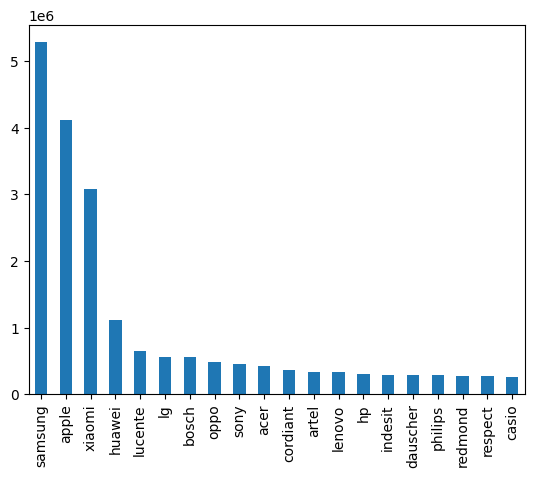

In [18]:
brand_count[:20].plot(kind='bar')

## Event Time

In [19]:
df.event_time

0           2019-10-01 00:00:00 UTC
1           2019-10-01 00:00:00 UTC
2           2019-10-01 00:00:01 UTC
3           2019-10-01 00:00:01 UTC
4           2019-10-01 00:00:04 UTC
                     ...           
42448759    2019-10-31 23:59:58 UTC
42448760    2019-10-31 23:59:58 UTC
42448761    2019-10-31 23:59:58 UTC
42448762    2019-10-31 23:59:59 UTC
42448763    2019-10-31 23:59:59 UTC
Name: event_time, Length: 42448764, dtype: object

In [20]:
df.event_time = pd.to_datetime(df.event_time)

In [11]:
import seaborn as sns
sns.set_style("darkgrid")

<ipython-input-22-c0704a372ffa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.event_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='event_time'>

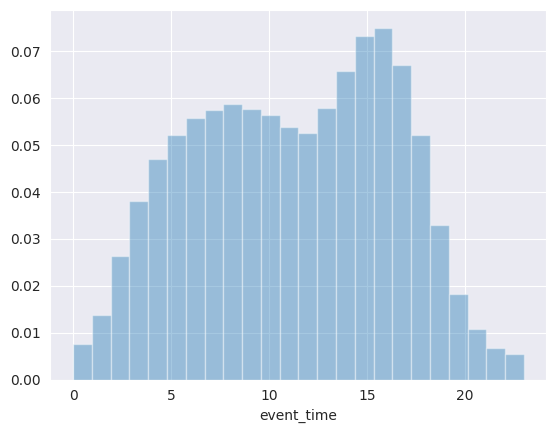

In [22]:
sns.distplot(df.event_time.dt.hour, bins=24, kde=False, norm_hist=True)

<ipython-input-23-5bf2637942ff>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.event_time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


<Axes: xlabel='event_time'>

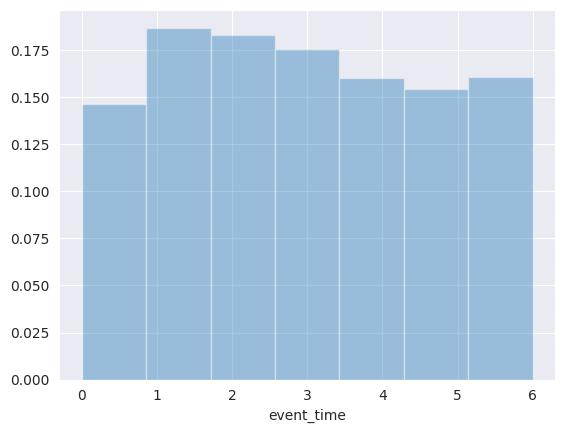

In [23]:
sns.distplot(df.event_time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

## Price

In [24]:
df.price

0             35.79
1             33.20
2            543.10
3            251.74
4           1081.98
             ...   
42448759     527.40
42448760      61.75
42448761     128.70
42448762     689.85
42448763     155.73
Name: price, Length: 42448764, dtype: float64

In [25]:
price_summary = df['price'].describe()
print(price_summary)

count    4.244876e+07
mean     2.903237e+02
std      3.582692e+02
min      0.000000e+00
25%      6.598000e+01
50%      1.629300e+02
75%      3.585700e+02
max      2.574070e+03
Name: price, dtype: float64


<ipython-input-12-4e950a5a3ae1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='price'>

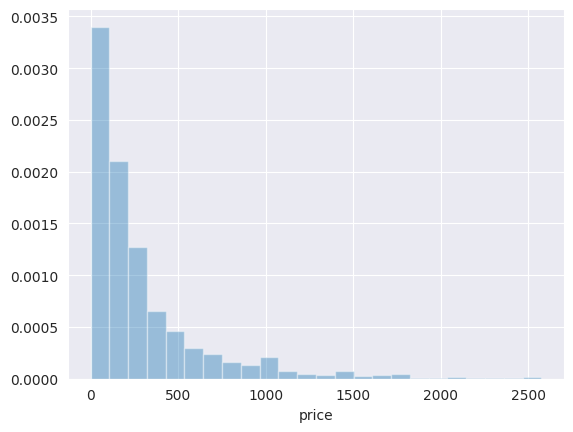

In [12]:
sns.distplot(df.price, bins=24, kde=False, norm_hist=True)

### Questions
- Which brands are the most popular among users?
- What is the average price of products purchased by users?
- Are there any seasonal trends in user behavior or sales?
- If yes, what are they?
- What is the average order value (AOV) for different product categories?
- Are there any correlations between event types, brands, or categories?
- Can you identify high-value customers based on their purchase history?